In [19]:
import iris 
import matplotlib.pyplot as plt
import iris.coord_categorisation
import numpy as np
import cartopy as cart
import os
import pandas as pd
import cartopy as cart
import glob

In [20]:
#--------------------------------------------------------------------------
# LOAD DATAFRAMES
#--------------------------------------------------------------------------

os.chdir('C:\\Users\\fb428\\OneDrive - University of Exeter\\Documents\\PhD\\papers\\manuscript3\\figures_and_data\\figure_making\\output_files\\')

site_info = pd.read_csv('station_info.csv')

site = pd.read_csv('diurnal_site.csv')
UKESM = pd.read_csv('diurnal_UKESM.csv')

#-------------tidy dataframes--------------------------------------------

site.rename(columns={'Ozone_avg':'mean_site', 'std':'std_site'}, inplace=True)
UKESM.rename(columns={'Ozone_avg':'mean_UKESM', 'std':'std_UKESM'}, inplace=True)

In [21]:
#--------------------------------------------------------------------------
# MERGE ALL SITES AND ADD NAMES
#--------------------------------------------------------------------------

locs = site_info[['item', 'name']].drop_duplicates()
chose_names = ['Amazonas', 'Porto Velho', 'Santarem', 'Congo', 'Bukit Koto', 'Watukosek',  'Daintree', 'Panama' ]


site_names = pd.merge(site, locs, on=['item'])
UKESM_names = pd.merge(UKESM, locs, on=['item'])

site_choice = site_names[site_names['name'].isin(chose_names)]
UKESM_choice = UKESM_names[UKESM_names['name'].isin(chose_names)]

n = len(chose_names)

In [22]:
displace = [3,3,3,23,18,18,14,5,3,]
displace_site = [3,3,3,0,0,0,0,0,3]
order = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

In [23]:
letter_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(j)', '(k)']

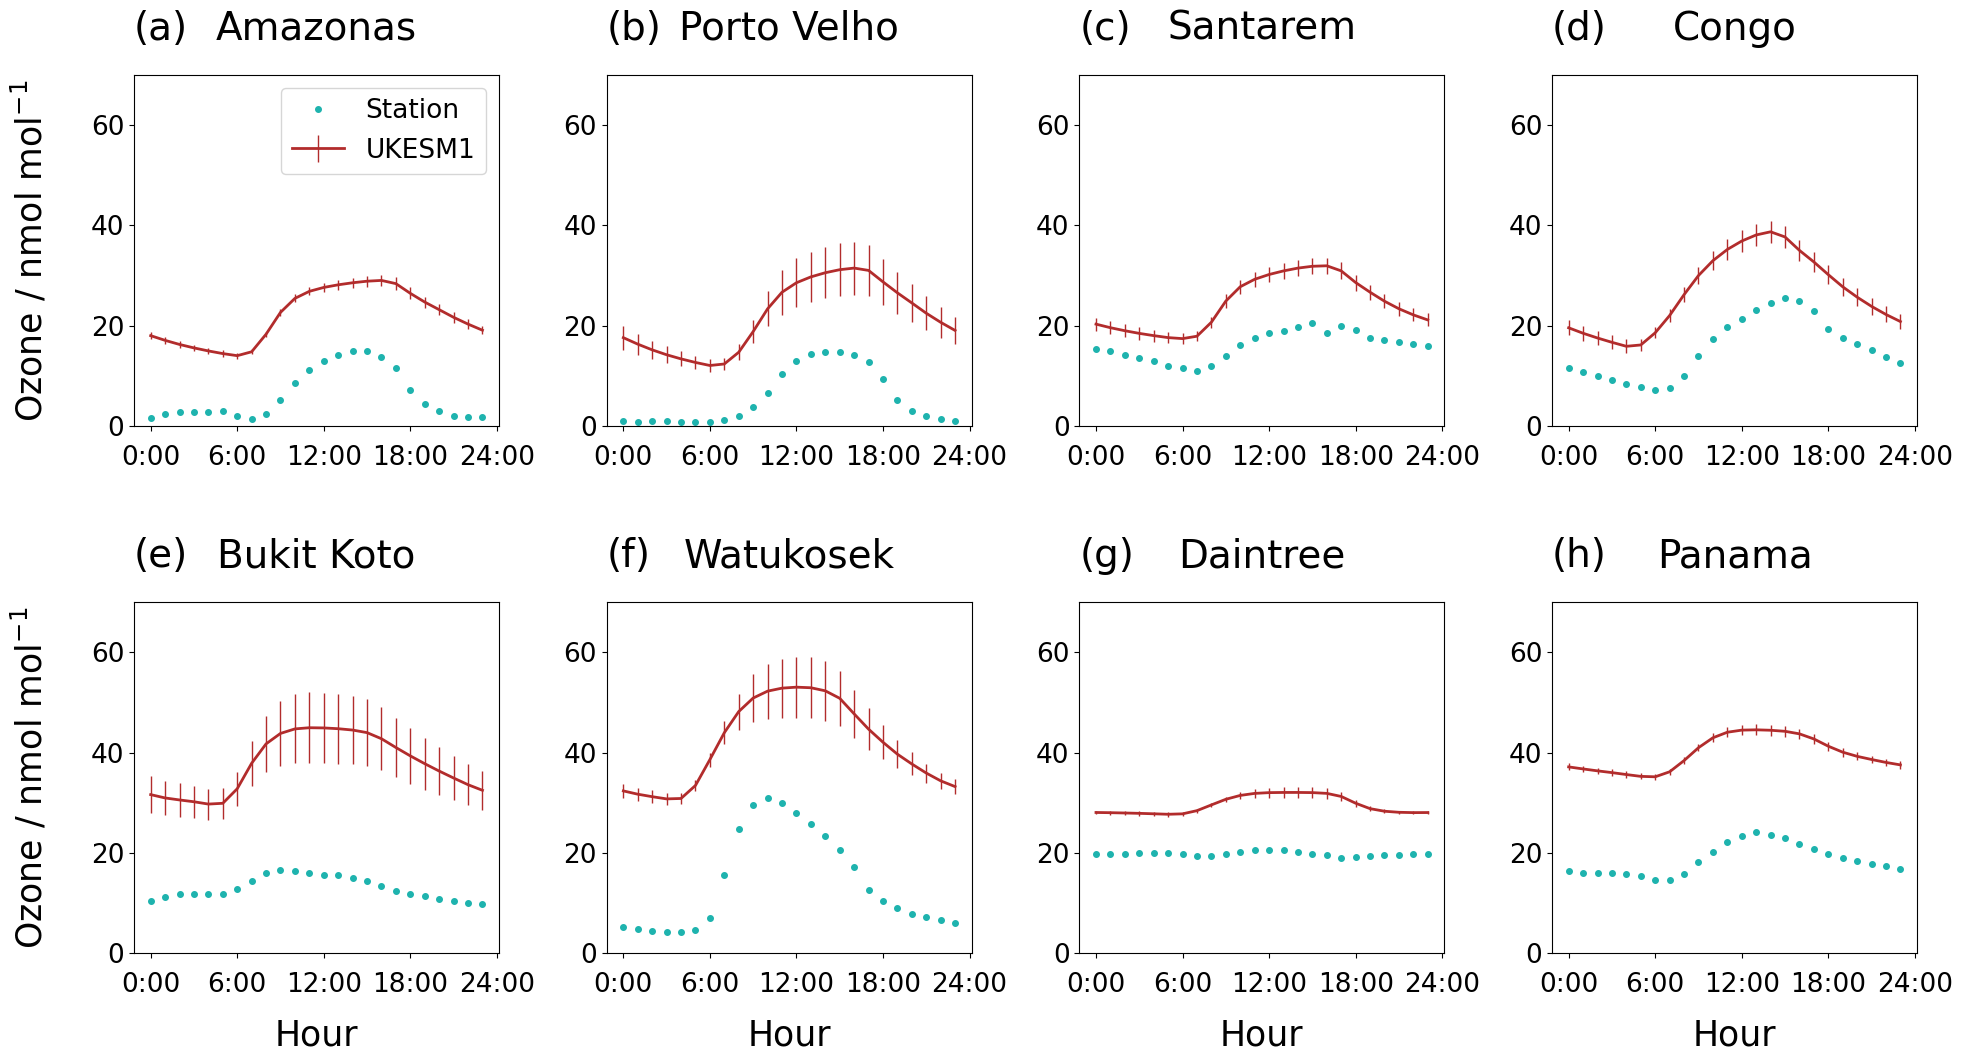

In [24]:
#----------------------------------------------------------------
# COMPARE DOR
#----------------------------------------------------------------

plt.figure(figsize=(20,11))
plt.rcParams['font.size']=19


for i in range(8):
    plt.subplot(2,4,i+1)

    site_name = chose_names[i]
    
#--------------------------------mean data--------------------------------------------
     
    site_df = site_choice[site_choice['name'] == site_name]    
    site_data = site_df['mean_site'].values[order[int(displace_site[i]):int(displace_site[i])+24]]
    
    UKESM_df = UKESM_choice[UKESM_choice['name'] == site_name]    
    UKESM_data = UKESM_df['mean_UKESM'].values[order[int(displace[i]):int(displace[i])+24]]
    
#--------------------------------std data--------------------------------------------

  
    yerr_site = site_df['std_site'].values[order[int(displace_site[i]):int(displace_site[i])+24]]
    yerr_UKESM = UKESM_df['std_UKESM'].values[order[int(displace[i]):int(displace[i])+24]]

#--------------------------------plot--------------------------------------------
        
    plt.errorbar(range(0,24), site_data,
                 elinewidth = 1, color=[0.1157, 0.7022, 0.6843], linestyle='', marker = 'o', markersize=4, label = 'Station')
    
    
    plt.errorbar(range(0,24), UKESM_data, yerr = yerr_UKESM, 
                 elinewidth = 1, color=[0.6980, 0.1725, 0.1725], linewidth=2, label = 'UKESM1')
   

    # axes
    plt.title(site_name, size=28, pad=25)
    plt.title(letter_labels[i], loc='left', size=28, pad=25)
    plt.ylim(0,70)
    plt.tick_params(axis='x', pad=10)
    plt.xticks(range(0,25,6), ['0:00', '6:00', '12:00', '18:00', '24:00'])
    
for i in [1,5]:
    plt.subplot(2,4,i)    
    plt.ylabel('Ozone / nmol mol$^{-1}$', size = 25, labelpad = 30)
    
for i in range(5,9):
    plt.subplot(2,4,i) 
    plt.xlabel('Hour', size = 25, labelpad = 15)
    

plt.subplot(241)
plt.legend(loc='upper right')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

plt.savefig('figures/diurnal.png', dpi=300)

In [25]:
site_names[site_names['name'] == 'Watukosek']

,Unnamed: 0.1,item,Hour,mean_site,std_site,Unnamed: 0,UKESM_Lat,UKESM_Lon,index_Lat,index_Lon,start_yr,end_yr,name
144,144,8.0,0.0,5.192251,NaN,6,-8.125,113.4375,65,60,1987,2011,Watukosek
145,145,8.0,1.0,4.787230,NaN,6,-8.125,113.4375,65,60,1987,2011,Watukosek
146,146,8.0,2.0,4.449437,NaN,6,-8.125,113.4375,65,60,1987,2011,Watukosek
147,147,8.0,3.0,4.329131,NaN,6,-8.125,113.4375,65,60,1987,2011,Watukosek
148,148,8.0,4.0,4.230757,NaN,6,-8.125,113.4375,65,60,1987,2011,Watukosek
149,149,8.0,5.0,4.578868,NaN,6,-8.125,113.4375,65,60,1987,2011,Watukosek
150,150,8.0,6.0,7.143369,NaN,6,-8.125,113.4375,65,60,1987,2011,Watukosek
151,151,8.0,7.0,15.564577,NaN,6,-8.125,113.4375,65,60,1987,2011,Watukosek
152,152,8.0,8.0,24.732327,NaN,6,-8.125,113.4375,65,60,1987,2011,Watukosek
153,153,8.0,9.0,29.610599,NaN,6,-8.125,113.4375,65,60,1987,2011,Watukosek


In [18]:
site_names[site_names['mean_site'] >= 30]

,Unnamed: 0.1,item,Hour,mean_site,std_site,Unnamed: 0,UKESM_Lat,UKESM_Lon,index_Lat,index_Lon,start_yr,end_yr,name
11,11,0.0,11.0,30.513906,NaN,0,6.875,284.0625,77,151,2012,2014,Bogota
12,12,0.0,12.0,33.308489,NaN,0,6.875,284.0625,77,151,2012,2014,Bogota
13,13,0.0,13.0,33.419905,NaN,0,6.875,284.0625,77,151,2012,2014,Bogota
14,14,0.0,14.0,31.770510,NaN,0,6.875,284.0625,77,151,2012,2014,Bogota
81,81,3.0,9.0,30.731673,NaN,3,-6.875,107.8125,66,57,1987,2011,Jakarta
82,82,3.0,10.0,33.234788,NaN,3,-6.875,107.8125,66,57,1987,2011,Jakarta
83,83,3.0,11.0,32.848957,NaN,3,-6.875,107.8125,66,57,1987,2011,Jakarta
154,154,8.0,10.0,30.876250,NaN,6,-8.125,113.4375,65,60,1987,2011,Watukosek
372,372,21.0,13.0,30.628068,0.0,17,-11.875,130.3125,62,69,2011,2014,Darwin
373,373,21.0,14.0,31.036058,0.0,17,-11.875,130.3125,62,69,2011,2014,Darwin
